In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from joblib import parallel_backend
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from mpl_toolkits.mplot3d import Axes3D
import pickle

In [2]:
df = pd.read_csv('/content/drive/MyDrive/magic04[1].data',names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])

In [3]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

 Attribute information:

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm]
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
   10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
   11.  class:    g,h         # gamma (signal), hadron (background)

In [4]:
#! pip install pandas-Profiling

In [5]:
#import pandas_profiling

In [6]:
# profile = df.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file='report.html')

In [7]:
# from google.colab import files
# files.download("report.html")

# Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [9]:
lb = LabelEncoder()

In [10]:
def func_for_LabelEncoding(data):

    encoded_data = data.copy()

    for column in encoded_data.columns:
        if encoded_data[column].dtype == 'object':
            label_encoder = LabelEncoder()
            encoded_data[column] = label_encoder.fit_transform(encoded_data[column])

    return encoded_data

In [11]:
df = func_for_LabelEncoding(df)

In [12]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      0  
1   6.3609  205.2610      0  
2  76.9600  256.7880      0  
3  10.4490  116.7370      0  
4   4.6480  356.4620      0

# Data Statistics

In [13]:
df.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      -4.331745     10.545545      0.249726     27.645707    193.818026   
std       59.206062     51.000118     20.827439     26.103621     74.731787   
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600   
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250   
50%        4.013050     15.314100      0.666200     17.679500    191.851450   
75%       24.063700     35.837800     10.946425     45.883550    240.563825   
max      575.240700    238.321000    179.851000     90.000000    495.561000   

              class  
count  19020.000000  
mean       0.351630  
std        0.477492  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [14]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [15]:
df.shape

(19020, 11)

# EDA

array([[<Axes: title={'center': 'fLength'}>,
        <Axes: title={'center': 'fWidth'}>,
        <Axes: title={'center': 'fSize'}>],
       [<Axes: title={'center': 'fConc'}>,
        <Axes: title={'center': 'fConc1'}>,
        <Axes: title={'center': 'fAsym'}>],
       [<Axes: title={'center': 'fM3Long'}>,
        <Axes: title={'center': 'fM3Trans'}>,
        <Axes: title={'center': 'fAlpha'}>],
       [<Axes: title={'center': 'fDist'}>,
        <Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

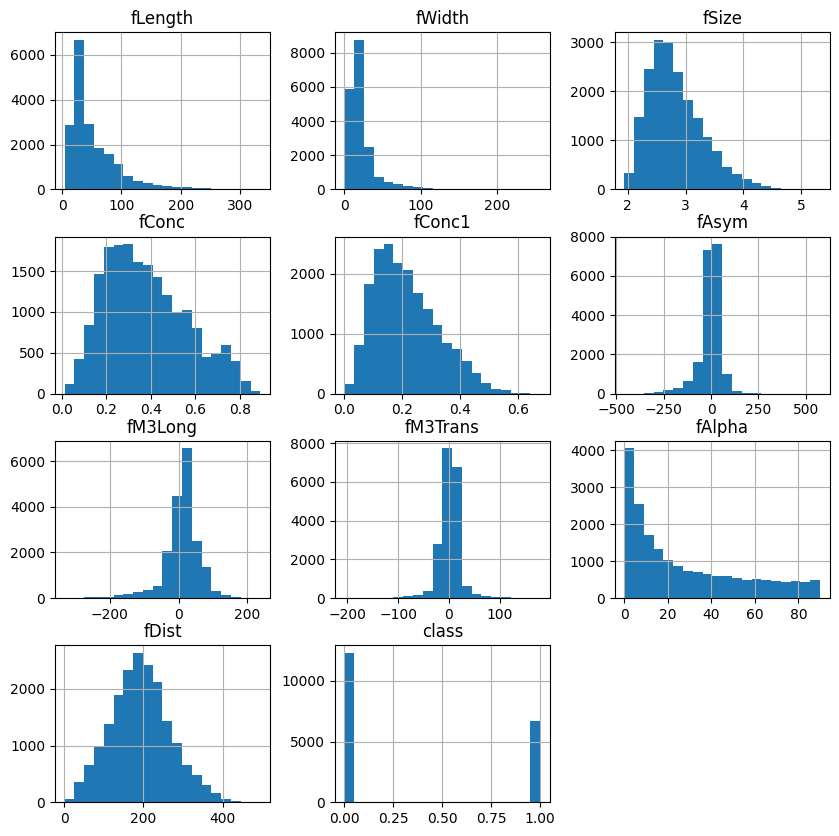

In [16]:
df.hist(figsize=(10,10),bins=20)

TWO PATTERNS DETECTED -> GAUSSIAN AND LEFT SKEWED GASSIAN.

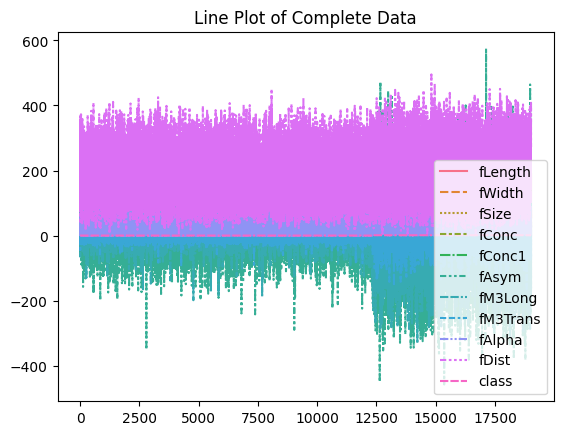

In [17]:
sns.lineplot(df)
plt.title("Line Plot of Complete Data")
plt.show()

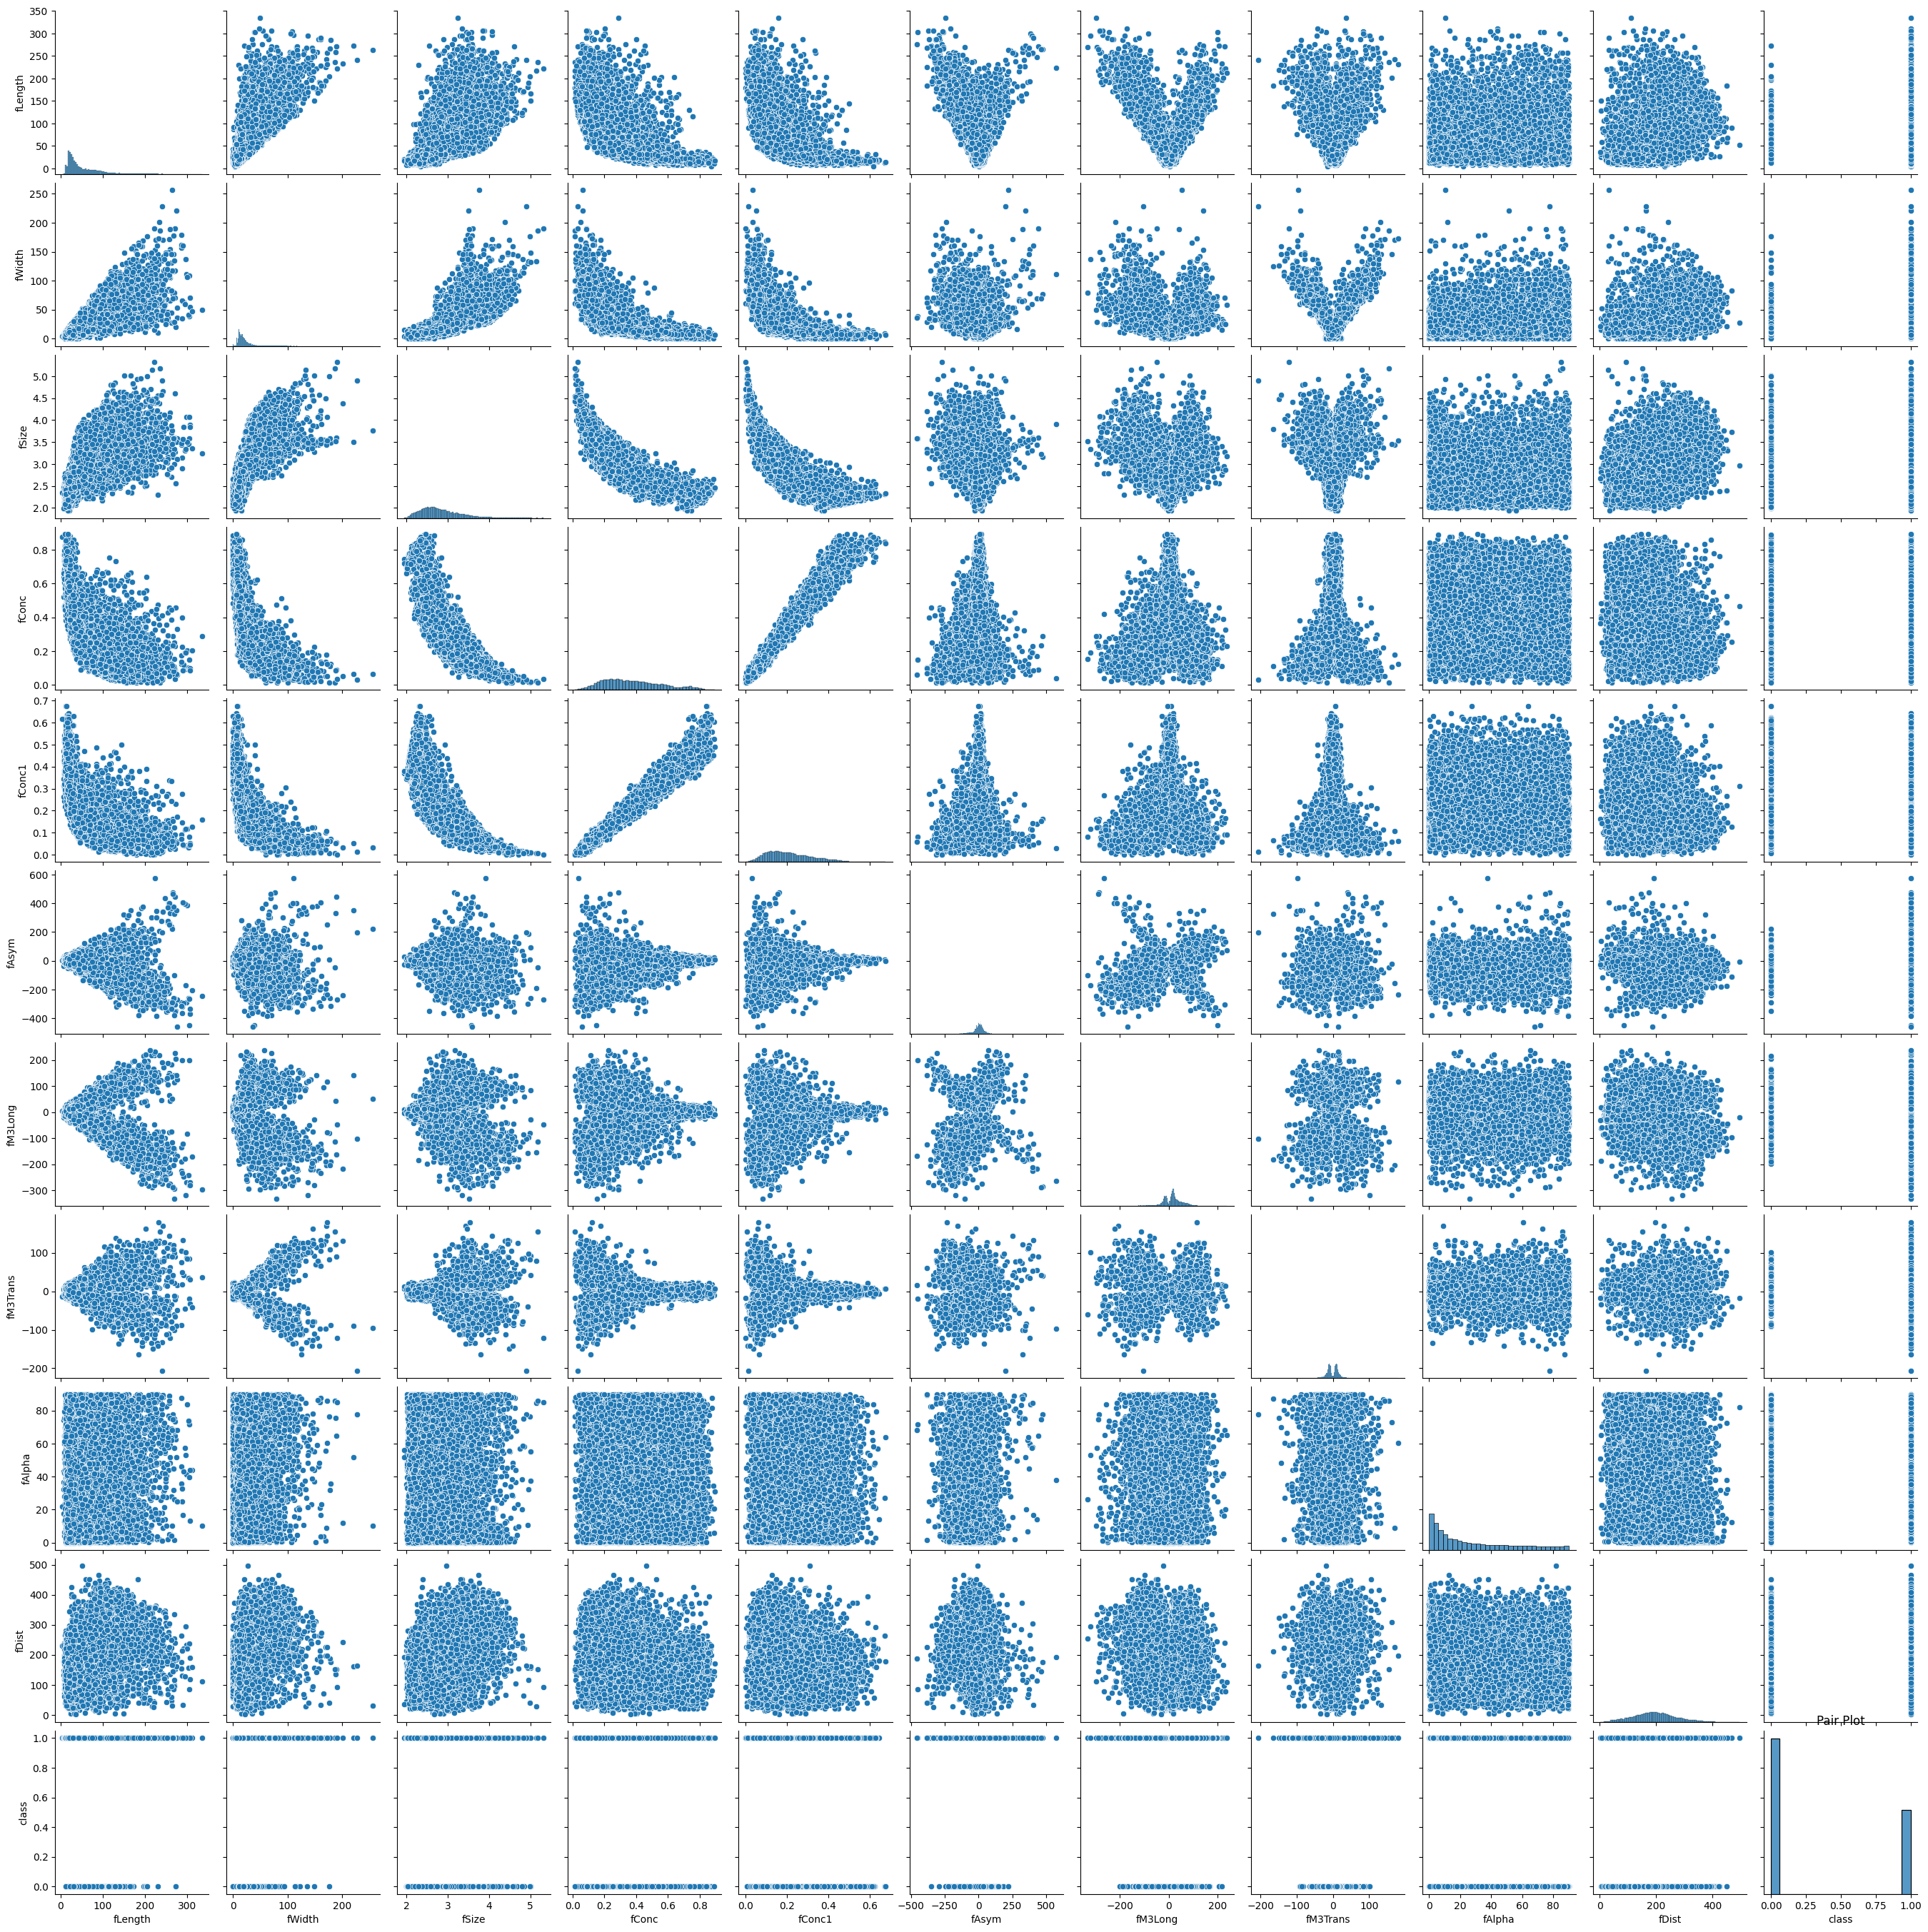

In [18]:
sns.pairplot(data=df)
plt.title("Pair Plot")
plt.show()

Our Data features showcase a good distribution and relationship with each other.

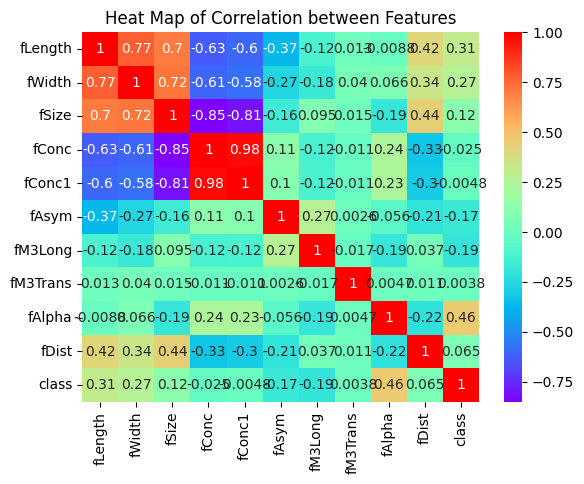

In [19]:
cor_matrix = df.corr()

sns.heatmap(data=cor_matrix,annot=True,cmap='rainbow')
plt.title("Heat Map of Correlation between Features")
plt.show()

**Observation:**

* flength, fWidth, fSize show good corelation between each other, which is quite obvious.
* fConc and fConc1 also shows similar relationship.

# Model Training

In [20]:
Q1 = np.percentile(df, 25)
Q3 = np.percentile(df, 75)

IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

data_without_outliers = df[(df >= lower_bound) & (df <= upper_bound)]

In [21]:
data_without_outliers.head()

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
0  28.7967  16.0021  2.6449  0.3918  0.1982  27.7004  22.0110   -8.2027   
1  31.6036  11.7235  2.5185  0.5303  0.3773  26.2722  23.8238   -9.9574   
2      NaN      NaN  4.0612  0.0374  0.0187      NaN      NaN       NaN   
3  23.8172   9.5728  2.3385  0.6147  0.3922  27.2107  -6.4633   -7.1513   
4      NaN  30.9205  3.1611  0.3168  0.1832  -5.5277  28.5525   21.8393   

    fAlpha  fDist  class  
0  40.0920    NaN      0  
1   6.3609    NaN      0  
2      NaN    NaN      0  
3  10.4490    NaN      0  
4   4.6480    NaN      0

In [22]:
print(data_without_outliers.shape)

(19020, 11)


Removing outliers in dataset wont help us with the classification as the data is about the features of high energy gamma particles and this features may have big differences in the vales.

We are dropping columns 'fAsym','fConc1','fM3Long' as they show very little to negative correlation to class.

In [23]:
X = df.drop(columns=['class','fAsym','fConc1','fM3Long'],axis=1)
y = df['class']

In [24]:
sc = StandardScaler()
scaled_data = sc.fit_transform(X)
std_x = pd.DataFrame(scaled_data,columns=X.columns)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
sampler = SMOTE()
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

In [27]:
y_train_resampled.value_counts()

1    8627
0    8627
Name: class, dtype: int64

In [28]:
results = []

In [29]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_resampled,y_train_resampled)
y_pred = lr.predict(X_test)
y_pred_probs = lr.predict_proba(X_test)[:, 1]
LogisticRegression_accuracy = lr.score(X_test,y_test)
print(LogisticRegression_accuracy)

0.7884682790045566


 The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background. For comparison of different classifiers an ROC curve has to be used.

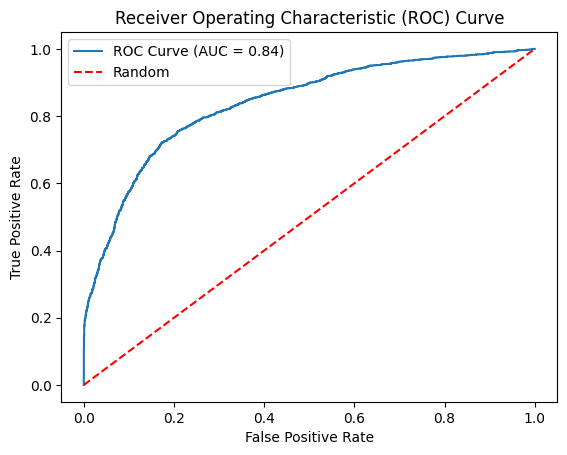

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
lr_auc = roc_auc_score(y_test, y_pred_probs)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(lr_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [31]:
results.append(('Logistic_Regression',lr_auc))

We have much better auc score = 0.84

With the help of this roc_auc_curve we can observe that the model predicts True Positives better than False Positive. A model with higher TPR and lower FPR indicates better classification performance.

# CROSS VALIDATION WITH SVM, DECISION TREE, AND RANDOMFOREST.

In [32]:
classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
     xgb.XGBClassifier()
]

with parallel_backend('multiprocessing'):
  for classifier in classifiers:
      scores = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=6,scoring='roc_auc')
      results.append((classifier.__class__.__name__, scores.mean()))

results.sort(key=lambda x: x[1], reverse=True)

for name, score in results:
    print(f"{name}: {score}")

RandomForestClassifier: 0.9554362974621425
XGBClassifier: 0.9454338423642469
SVC: 0.8685612511243068
Logistic_Regression: 0.8391009623393431
DecisionTreeClassifier: 0.8265905473883963


# ENSEMBLE LEARNING

In [33]:
clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = xgb.XGBClassifier()
clf4 = RandomForestClassifier()

ensemble_model = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('xbg', clf3),('rfc',clf4)], voting='hard')

with parallel_backend('multiprocessing'):
  ensemble_model.fit(X_train_resampled, y_train_resampled)
  y_pred = ensemble_model.predict(X_test)

ensemble_learning = roc_auc_score(y_test, y_pred)
results.append(('Ensemble Learning',ensemble_learning))
print("Validation Accuracy:", ensemble_learning)

Validation Accuracy: 0.8430481115717445


# MODEL FINE TUNING

In [34]:
clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [80, 100, 120],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
}

with parallel_backend('multiprocessing'):

    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X, y)

best_params = grid_search.best_params_
best_clf = RandomForestClassifier(**best_params)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

fine_tune_rf_accuracy = roc_auc_score(y_test, y_pred)
results.append(('Fine tune Random Forest',fine_tune_rf_accuracy))
print("Validation Accuracy:", fine_tune_rf_accuracy)

Validation Accuracy: 0.8511104771500889


# **CLUSTERING**

# KMEANS

In [35]:
clustering_score = []

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


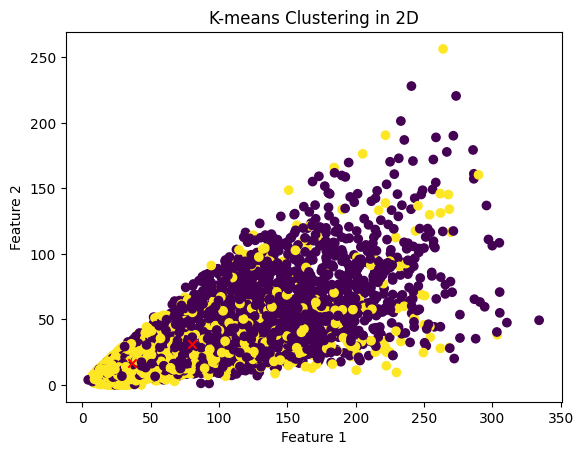

In [36]:
X1 = X.values
k=2
kmeans = KMeans(n_clusters=k)

kmeans.fit(X1)

kmeans_labels = kmeans.labels_

centroids = kmeans.cluster_centers_

plt.scatter(X1[:, 0], X1[:, 1], c=kmeans_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering in 2D')
plt.show()

The distance between the centroids shows that the clusters have some differences and when viewed in a higher dimension will make more meaningful observations.

# 3D view of the cluster

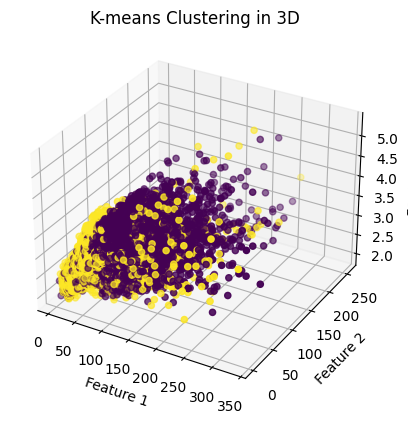

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=kmeans_labels)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='red')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-means Clustering in 3D')
plt.show()

In [38]:
kmeans_score = silhouette_score(X1, kmeans_labels)
clustering_score.append(('KMeans Clustering score',kmeans_score))
print("Silhouette Score for Kmeans:", kmeans_score)

Silhouette Score for Kmeans: 0.39485505127614073


The Silhouette Score ranges from -1 to 1, where higher values indicate better-defined clusters. Values close to 0 indicate overlapping clusters, and negative values suggest that samples have been assigned to incorrect clusters.

# DBSCAN

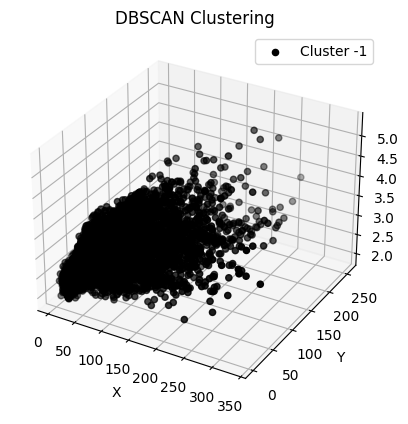

In [39]:
dbscan = DBSCAN(eps=0.3, min_samples=5)

dbscan.fit(X1)
DBSCAN_labels = dbscan.labels_
unique_labels = np.unique(DBSCAN_labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
    if label == -1:
        color = 'k'
    else:
        color = np.random.rand(3,)

    cluster_points = X1[DBSCAN_labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {label}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('DBSCAN Clustering')
ax.legend()
plt.show()

# GAUSSIAN MIXTURE MODEL CLUSTERING

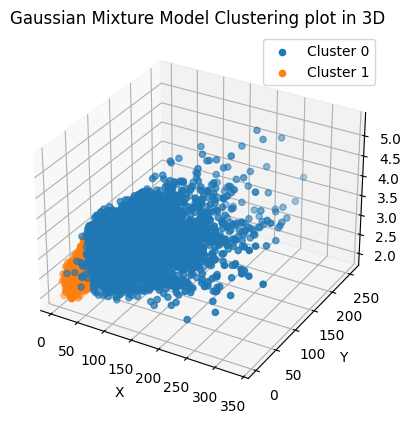

In [40]:
gmm = GaussianMixture(n_components=2)

gmm.fit(X1)
gmm_labels = gmm.predict(X1)

unique_labels = np.unique(gmm_labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:

    cluster_points = X1[gmm_labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {label}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gaussian Mixture Model Clustering plot in 3D')
ax.legend()
plt.show()

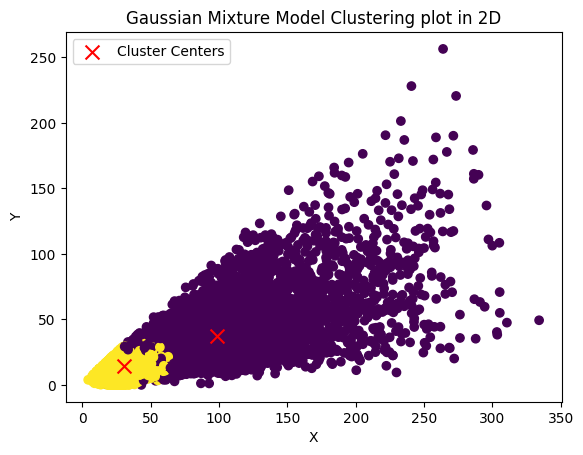

In [41]:
means = gmm.means_

plt.scatter(X1[:, 0], X1[:, 1], c=gmm_labels, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Model Clustering plot in 2D')
plt.legend()
plt.show()

In [42]:
gmm_score = silhouette_score(X1, gmm_labels)
clustering_score.append(('GMM Clustering score',gmm_score))
print("Silhouette Score for GMM Clustering:", gmm_score)

Silhouette Score for GMM Clustering: 0.3234872015875022


# Agglomerative Clustering

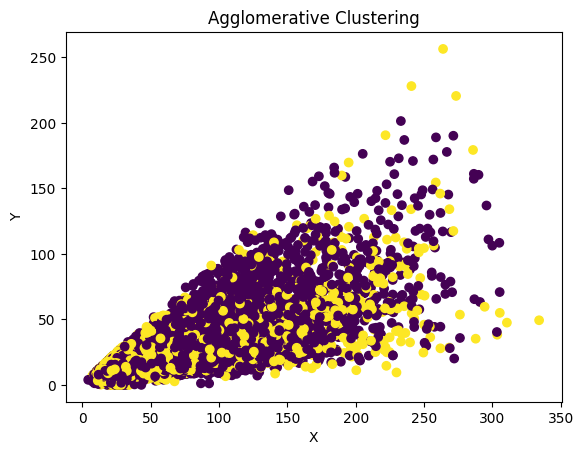

In [43]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X1)
agg_labels = agg_clustering.labels_

plt.scatter(X1[:, 0], X1[:, 1], c=agg_labels, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Agglomerative Clustering')
plt.show()

In [44]:
agg_score = silhouette_score(X1, agg_labels)
clustering_score.append(('Agglomerative Clustering score',agg_score))
print("Silhouette Score for Agglomerative Clustering:", agg_score)

Silhouette Score for Agglomerative Clustering: 0.33229891425305813


In [45]:
print(results)
print(clustering_score)

[('RandomForestClassifier', 0.9554362974621425), ('XGBClassifier', 0.9454338423642469), ('SVC', 0.8685612511243068), ('Logistic_Regression', 0.8391009623393431), ('DecisionTreeClassifier', 0.8265905473883963), ('Ensemble Learning', 0.8430481115717445), ('Fine tune Random Forest', 0.8511104771500889)]
[('KMeans Clustering score', 0.39485505127614073), ('GMM Clustering score', 0.3234872015875022), ('Agglomerative Clustering score', 0.33229891425305813)]


In [46]:
best_result_for_classification = max(results,key = lambda x : x[1])
print(best_result_for_classification)

('RandomForestClassifier', 0.9554362974621425)


In [47]:
best_result_for_clustering = max(clustering_score,key = lambda x : x[1])
print(best_result_for_clustering)

('KMeans Clustering score', 0.39485505127614073)


In [48]:
with open('classification_accuracy.pkl', 'wb') as f:
    pickle.dump(best_result_for_classification, f)

with open('clustering_accuracy.pkl', 'wb') as f:
    pickle.dump(best_result_for_clustering, f)

In [49]:
model1 = RandomForestClassifier()

In [50]:
model2 = kmeans

In [51]:
with open('model1.pkl', 'wb') as f:
    pickle.dump(model1, f)

In [52]:
with open('model2.pkl', 'wb') as f:
    pickle.dump(model2, f)

In [54]:
from google.colab import files

files.download('classification_accuracy.pkl')
files.download('clustering_accuracy.pkl')
files.download('model1.pkl')
files.download('model2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

In [57]:
#files.download('X_train.pkl')
files.download('y_train.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
random_row = X.sample(n=1)
print(random_row)
data_without_feature_names = random_row.values

In [ ]:
with open('model1.pkl', 'rb') as f:
    model1 = pickle.load(f)

In [ ]:
with open('model2.pkl', 'rb') as f:
    model2 = pickle.load(f)

In [ ]:
model1.fit(X_train,y_train)
classification_predictions = model1.predict(random_row)

In [ ]:
classification_predictions

In [ ]:
clusttering_prediction = model2.predict(data_without_feature_names)
clusttering_prediction

In [60]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

In [61]:
from google.colab import files
files.download('X_train.csv')
files.download('y_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>